In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt

#Algoritmos != de suma de n  valores.
def suma(lista):
    suma = 0.0
    for x in lista:
        suma = suma + x
    return suma


def suma_ordenada(lista):
    lista = np.sort(lista)
    suma = 0.0
    for x in lista:
        suma = suma + x
    return suma

def suma_ordenada_decreciente(lista):
    lista = np.sort(lista)[::-1]
    suma = 0.0
    for x in lista:
        suma = suma + x
    return suma

def suma_kahan(lista):
    suma = 0.0
    c = 0.0
    for x in lista:
        y = x - c
        t = suma + y
        c = (t - suma) - y
        suma = t
    return suma

def suma_numpy(lista):
    return np.sum(lista)


#Construye elementos de una serie geometrica de tamaño n desordenada
def serie_geometrica_desordenada(n,r, seed=1):
    np.random.seed(seed)
    return np.random.permutation(r**np.arange(n))
#Devuelve la suma de una serie geo de razon r x formula cerrada
def suma_serie_geométrica(n,r):
    return (1 - r**n)/(1-r)


n = 10
r = 0.99
lista = serie_geometrica_desordenada(n,r)

#Voy a experimentar con los algortimos de sumas : Kahan, ord, ord decreciente , suma numpy , suma pura.
# Guardo en distintas variables los tiempos y errores de c/tipo de suma

data_kahan={
    'times':dict(),
    'error':dict()
}
data_sorted={
    'times':dict(),
    'error':dict()
}
data_sorted_dec={
    'times':dict(),
    'error':dict()
}
data_numpy={
    'times':dict(),
    'error':dict()
}
data_sum={
    'times':dict(),
    'error':dict()
}

#Para calcular el error de una muestra , comparamos con la formula cerrada :
# error : abs(f'(x)-f(x)) siendo f la formula   

for i in range(1,6):
    l_size=pow(n,i)
    #En c/iteracion , aumentamos |A| y tomamos muestra del algoritmo
    lista = serie_geometrica_desordenada(l_size,r)
    #Calculamos el valor exacto x formula
    suma_geo=suma_serie_geométrica(l_size,r)

    #Tomamos las muestas ; para cada algoritmo
    #Nos guardamos el mejor tiempo para esa entrada y el error relativo

    times=%timeit -r 1000 -n 10 -o suma_kahan(lista)      #Ver de modificar #muestras y ejecuciones!
    data_kahan['times'][l_size]=times.best
    data_kahan['error'][l_size]=np.abs(suma_kahan(lista)-suma_geo)

    times=%timeit -r 1000 -n 10 -o suma_ordenada(lista)
    data_sorted['times'][l_size]=times.best
    data_sorted['error'][l_size]=np.abs(suma_ordenada(lista)-suma_geo)
    

    times=%timeit -r 1000 -n 10 -o suma_ordenada_decreciente(lista)
    data_sorted_dec['times'][l_size]=times.best
    data_sorted_dec['error'][l_size]=np.abs(suma_ordenada_decreciente(lista)-suma_geo)

    times=%timeit -r 1000 -n 10 -o suma_numpy(lista)
    data_numpy['times'][l_size]=times.best
    data_numpy['error'][l_size]=np.abs(suma_numpy(lista)-suma_geo)

    times=%timeit -r 1000 -n 10 -o suma(lista)
    data_sum['times'][l_size]=times.best
    data_sum['error'][l_size]=np.abs(suma(lista)-suma_geo)


    

#Armamos plot de timepo de ejecucion

data=data_sorted['times'].items()
data=sorted(data)
x,y=zip(*data)
plt.plot(x,y,'-o',label='Suma Ordenada',color='orange')

data=data_kahan['times'].items()
data=sorted(data)
x,y1=zip(*data)
plt.plot(x,y1,'-o',label='Suma Kahan',color='red')


data=data_sorted_dec['times'].items()
data=sorted(data)
x,y2=zip(*data)
plt.plot(x,y2,'-o',label='Suma decreciente',color='green')


data=data_numpy['times'].items()
data=sorted(data)
x,y3=zip(*data)
plt.plot(x,y3,'-o',label='Suma Numpy',color='purple')


data=data_sum['times'].items()
data=sorted(data)
x,y4=zip(*data)
plt.plot(x,y4,'-o',label='Suma Regular',color='blue')

plt.legend(loc='upper left')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño de la entrada')
plt.ylabel('Mejor tiempo (s)')









Text(0, 0.5, 'Error absoluto')

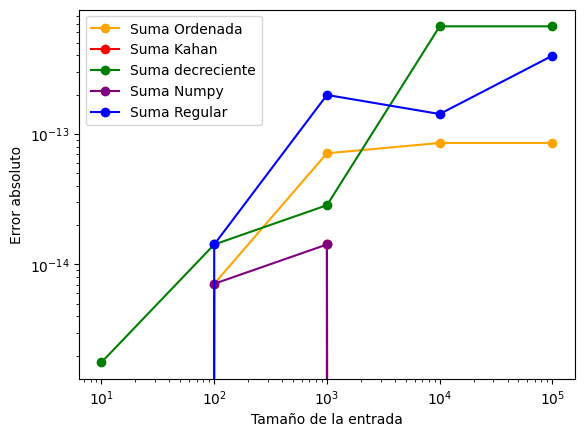

In [26]:
#Armamos plot de errores
data=data_sorted['error'].items()
data=sorted(data)
x,y=zip(*data)
plt.plot(x,y,'-o',label='Suma Ordenada',color='orange')

data=data_kahan['error'].items()
data=sorted(data)
x,y1=zip(*data)
plt.plot(x,y1,'-o',label='Suma Kahan',color='red')


data=data_sorted_dec['error'].items()
data=sorted(data)
x,y2=zip(*data)
plt.plot(x,y2,'-o',label='Suma decreciente',color='green')


data=data_numpy['error'].items()
data=sorted(data)
x,y3=zip(*data)
plt.plot(x,y3,'-o',label='Suma Numpy',color='purple')


data=data_sum['error'].items()
data=sorted(data)
x,y4=zip(*data)
plt.plot(x,y4,'-o',label='Suma Regular',color='blue')

plt.legend(loc='upper left')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño de la entrada')
plt.ylabel('Error absoluto')